In [ ]:
%pip install networkx">=2.5"
%pip install scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
valor_patrimonial = ctrl.Antecedent(np.arange(0, 10001, 1), 'valor_patrimonial')
renda_mensal = ctrl.Antecedent(np.arange(1000, 10001, 1), 'renda_mensal')
potencial_cliente = ctrl.Consequent(np.arange(0, 11, 1), 'potencial_cliente')


valor_patrimonial['baixo'] = fuzz.trimf(valor_patrimonial.universe, [-4000, 0, 4000])
valor_patrimonial['medio'] = fuzz.trimf(valor_patrimonial.universe, [1000, 5000, 9000])
valor_patrimonial['alto'] = fuzz.trimf(valor_patrimonial.universe, [6000, 10000, 14000])

renda_mensal['baixa'] = fuzz.trimf(renda_mensal.universe, [-3200, 1000, 3400])
renda_mensal['media'] = fuzz.trimf(renda_mensal.universe, [1000, 3400, 6700])
renda_mensal['alta'] = fuzz.trimf(renda_mensal.universe, [3400, 6700, 10000])
renda_mensal['muito_alta'] = fuzz.trimf(renda_mensal.universe, [6700, 10000, 13300])

potencial_cliente['baixo'] = fuzz.trapmf(potencial_cliente.universe, [-3.6, -0.4, 0.4, 3.6])
potencial_cliente['medio'] = fuzz.trimf(potencial_cliente.universe, [1, 5, 9])
potencial_cliente['alto'] = fuzz.trimf(potencial_cliente.universe, [6, 10, 14])

In [4]:
regra1 = ctrl.Rule(valor_patrimonial['baixo'] & renda_mensal['baixa'], potencial_cliente['baixo'])
regra2 = ctrl.Rule(valor_patrimonial['baixo'] & renda_mensal['media'], potencial_cliente['baixo'])
regra3 = ctrl.Rule(valor_patrimonial['baixo'] & renda_mensal['alta'], potencial_cliente['medio'])
regra4 = ctrl.Rule(valor_patrimonial['baixo'] & renda_mensal['muito_alta'], potencial_cliente['alto'])

regra5 = ctrl.Rule(valor_patrimonial['medio'] & renda_mensal['baixa'], potencial_cliente['baixo'])
regra6 = ctrl.Rule(valor_patrimonial['medio'] & renda_mensal['media'], potencial_cliente['medio'])
regra7 = ctrl.Rule(valor_patrimonial['medio'] & renda_mensal['alta'], potencial_cliente['alto'])
regra8 = ctrl.Rule(valor_patrimonial['medio'] & renda_mensal['muito_alta'], potencial_cliente['alto'])

regra9 = ctrl.Rule(valor_patrimonial['alto'] & renda_mensal['baixa'], potencial_cliente['medio'])
regra10 = ctrl.Rule(valor_patrimonial['alto'] & renda_mensal['media'], potencial_cliente['medio'])
regra11 = ctrl.Rule(valor_patrimonial['alto'] & renda_mensal['alta'], potencial_cliente['alto'])
regra12 = ctrl.Rule(valor_patrimonial['alto'] & renda_mensal['muito_alta'], potencial_cliente['alto'])

8.656565656565656


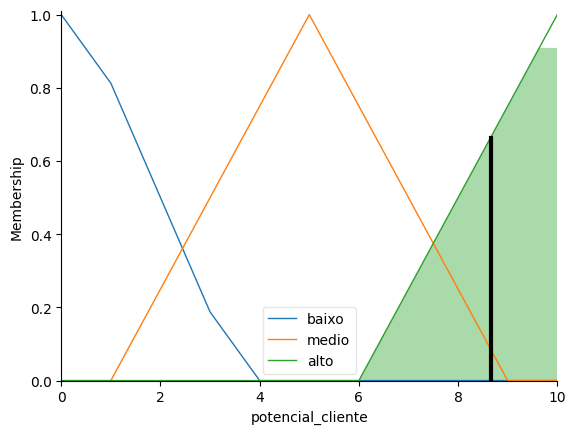

In [7]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6,
                                    regra7, regra8, regra9, regra10, regra11, regra12])

simulacao = ctrl.ControlSystemSimulation(sistema_controle)


simulacao.input['valor_patrimonial'] = 5000
simulacao.input['renda_mensal'] = 7000


simulacao.compute()


print(simulacao.output['potencial_cliente'])
potencial_cliente.view(sim=simulacao)